# Import libraries

In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import bs4 as bs
import requests

In [7]:
# The code was removed by Watson Studio for sharing.

,Workspace,100-299,300-499,500-699,700-899,900 and above
0,Raffles Place /Tanjong Pagar,11,19,6,6,0
1,Orchard/Tanglin/Bukit Timah,1,4,1,3,3
2,Bugis/City Hall,5,5,5,5,1
3,Suntec/Esplanade,4,3,.,1,0
4,Clarke Quay/Robertson Quay,0,5,1,0,1
5,Kallng/Lavender,0,0,1,0,0
6,Geylang/MacPherson/Katong,4,5,2,0,2
7,Novena/Balestier/Toa Payoh,1,2,2,0,0
8,West/one-north,1,2,2,0,0
9,North,1,2,0,0,0


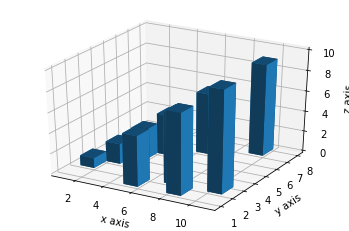

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = [1,2,3,4,5,6,7,8,9,10]
ypos = [2,3,4,5,1,6,2,1,7,2]
zpos = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(xpos,ypos, zpos, dx, dy,dz)

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')


plt.show()


In [16]:
# The code was removed by Watson Studio for sharing.

,MRT,Latitude,Longitude,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Novena,1.320394,103.843689,NaN,NaN,NaN
1,Marymount,1.349078,103.839492,NaN,NaN,NaN
2,MacPherson,1.326650,103.890019,NaN,NaN,NaN
3,Ubi,1.330011,103.899958,NaN,NaN,NaN
4,Eunos,1.319725,103.903108,NaN,NaN,NaN
5,Paya Lebar,1.317767,103.892381,NaN,NaN,NaN
6,Tampines,1.352528,103.945322,NaN,NaN,NaN
7,one-north,1.299331,103.787067,NaN,NaN,NaN


## Import relevant libraries

In [17]:
#import numpy as np # library to handle data in a vectorized manner

#import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

## Foursquare credentials

In [18]:
CLIENT_ID = '3PBEAYTI2K4AE30EHWSJ1T535K0RCG1XN2SCS1B51OFFNNTL' # your Foursquare ID
CLIENT_SECRET = 'J1AV4BSAPW4RFMTSLBUF0EHWYJTAKL1MUNC5FWPUOAVPO3P3' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3PBEAYTI2K4AE30EHWSJ1T535K0RCG1XN2SCS1B51OFFNNTL
CLIENT_SECRET:J1AV4BSAPW4RFMTSLBUF0EHWYJTAKL1MUNC5FWPUOAVPO3P3


## Determine geographical coordinates of Singapore

In [19]:
address = 'Singapore Singapore'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


## Get the top 100 venues that are in Singapore within a radius of 500 meters. 

In [20]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, #Singapore latitude
    longitude, #Singapore longitude
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=3PBEAYTI2K4AE30EHWSJ1T535K0RCG1XN2SCS1B51OFFNNTL&client_secret=J1AV4BSAPW4RFMTSLBUF0EHWYJTAKL1MUNC5FWPUOAVPO3P3&v=20180604&ll=1.357107,103.8194992&radius=500&limit=100'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea8542171c428001f7910d9'},
 'response': {'headerLocation': 'Bishan',
  'headerFullLocation': 'Bishan, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 13,
  'suggestedBounds': {'ne': {'lat': 1.3616070045000046,
    'lng': 103.82399206272395},
   'sw': {'lat': 1.3526069954999955, 'lng': 103.81500633727605}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e1838aa14957dc705d4d8ab',
       'name': 'SICC The Lookout',
       'location': {'address': 'Singapore Island Country Club (Island Location)',
        'crossStreet': 'Island Club Rd.',
        'lat': 1.3591051105392742,
        'lng': 103.81859828470789,
        'labeledLatLngs': [{'label': 'display',
          'lat': 1.3591051105392742,
          'lng': 

## Get the categories

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,SICC The Lookout,Café,1.359105,103.818598
1,SICC Swimming Pool,Pool,1.357949,103.818607
2,Island Bowl,Bowling Alley,1.358052,103.818661
3,Silk Restaurant,Chinese Restaurant,1.359086,103.818634
4,Island Gym,Gym,1.357925,103.818560


In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

13 venues were returned by Foursquare.


## Explore Neighborhoods in Singapore

## Process all the neighborhoods in Singapore

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



In [27]:
singapore_venues = getNearbyVenues(names=mrt_df['MRT'],
                                   latitudes=mrt_df['Latitude'],
                                   longitudes=mrt_df['Longitude']
                                  )

Novena
Marymount
MacPherson
Ubi
Eunos
Paya Lebar
Tampines
one-north


In [28]:
print(singapore_venues.shape)
singapore_venues.head()

(292, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Novena,1.320394,103.843689,Ah Chew Desserts 阿秋甜品 (Ah Chew Desserts),1.318411,103.843714,Dessert Shop
1,Novena,1.320394,103.843689,Courtyard by Marriott Singapore Novena,1.320528,103.843221,Hotel
2,Novena,1.320394,103.843689,Joe & Dough,1.320738,103.843819,Sandwich Place
3,Novena,1.320394,103.843689,Udders,1.318253,103.843948,Ice Cream Shop
4,Novena,1.320394,103.843689,Running Lab,1.319204,103.843548,Sporting Goods Shop


## Number of venues in each neighborhood

In [29]:
singapore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Eunos,19,19,19,19,19,19
MacPherson,13,13,13,13,13,13
Marymount,6,6,6,6,6,6
Novena,62,62,62,62,62,62
Paya Lebar,78,78,78,78,78,78
Tampines,58,58,58,58,58,58
Ubi,14,14,14,14,14,14
one-north,42,42,42,42,42,42


In [30]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 85 uniques categories.


## Analyze Each Neighborhood

In [31]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Neighborhood'] = singapore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Bookstore,Breakfast Spot,Bubble Tea Shop,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Chinese Restaurant,Climbing Gym,Clothing Store,Coffee Shop,Cosmetics Shop,Dessert Shop,Diner,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food Court,Food Stand,Fried Chicken Joint,Furniture / Home Store,Gastropub,General Entertainment,German Restaurant,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Hobby Shop,Hong Kong Restaurant,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Liquor Store,Malay Restaurant,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Multiplex,Noodle House,Office,Other Repair Shop,Outdoors & Recreation,Pharmacy,Pizza Place,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shopping Mall,Skate Park,Snack Place,Soup Place,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theme Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant
0,Novena,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Novena,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Novena,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Novena,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Novena,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
singapore_onehot.shape

(292, 86)

In [33]:
singapore_grouped = singapore_onehot.groupby('Neighborhood').mean().reset_index()
singapore_grouped

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Bookstore,Breakfast Spot,Bubble Tea Shop,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Chinese Restaurant,Climbing Gym,Clothing Store,Coffee Shop,Cosmetics Shop,Dessert Shop,Diner,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food Court,Food Stand,Fried Chicken Joint,Furniture / Home Store,Gastropub,General Entertainment,German Restaurant,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Hobby Shop,Hong Kong Restaurant,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Liquor Store,Malay Restaurant,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Multiplex,Noodle House,Office,Other Repair Shop,Outdoors & Recreation,Pharmacy,Pizza Place,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shopping Mall,Skate Park,Snack Place,Soup Place,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theme Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant
0,Eunos,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.00000,0.052632,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.157895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.00000
1,MacPherson,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.076923,0.00000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,Marymount,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,Novena,0.000000,0.032258,0.000000,0.016129,0.032258,0.016129,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112903,0.032258,0.000000,0.000000,0.080645,0.000000,0.016129,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.016129,0.000000,0.016129,0.016129,0.000000,0.016129,0.000000,0.000000,0.016129,0.064516,0.016129,0.016129,0.0000

## Confirm new size

In [34]:
singapore_grouped.shape

(8, 86)

## Top 5 common venues in each neighborhood

In [35]:
num_top_venues = 5

for hood in singapore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = singapore_grouped[singapore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Eunos----
                venue  freq
0         Coffee Shop  0.16
1  Chinese Restaurant  0.16
2        Noodle House  0.11
3    Asian Restaurant  0.11
4                 Gym  0.05


----MacPherson----
                    venue  freq
0              Food Court  0.15
1            Climbing Gym  0.08
2               BBQ Joint  0.08
3        Asian Restaurant  0.08
4  Furniture / Home Store  0.08


----Marymount----
                   venue  freq
0     Chinese Restaurant  0.33
1             Food Court  0.17
2                 Bakery  0.17
3  Outdoors & Recreation  0.17
4        Thai Restaurant  0.17


----Novena----
                 venue  freq
0                 Café  0.11
1          Coffee Shop  0.08
2   Italian Restaurant  0.06
3                Hotel  0.06
4  Japanese Restaurant  0.06


----Paya Lebar----
                  venue  freq
0         Shopping Mall  0.08
1  Fast Food Restaurant  0.08
2           Coffee Shop  0.05
3      Asian Restaurant  0.05
4            Food Court  0.05


----T

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Create new dataframe and display 10 venues for each neighborhood

In [41]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = singapore_grouped['Neighborhood']

for ind in np.arange(singapore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(8)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Eunos,Coffee Shop,Chinese Restaurant,Asian Restaurant,Noodle House,Train Station,Gym,Pizza Place,Bookstore,Breakfast Spot,Bubble Tea Shop,Food Court,Vegetarian / Vegan Restaurant,Seafood Restaurant,Food Stand,Electronics Store
1,MacPherson,Food Court,Hobby Shop,Gym / Fitness Center,Office,Climbing Gym,Metro Station,Cafeteria,Furniture / Home Store,Thai Restaurant,BBQ Joint,Asian Restaurant,Other Repair Shop,Gym,German Restaurant,General Entertainment
2,Marymount,Chinese Restaurant,Outdoors & Recreation,Bakery,Thai Restaurant,Food Court,Yunnan Restaurant,Fried Chicken Joint,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food Stand,Gastropub,Furniture / Home Store,Diner
3,Novena,Café,Coffee Shop,Hotel,Japanese Restaurant,Italian Restaurant,Ramen Restaurant,Pharmacy,Restaurant,Sandwich Place,Chinese Restaurant,Bakery,Supermarket,Thai Restaurant,Asian Restaurant,Hong Kong Restaurant
4,Paya Lebar,Fast Food Restaurant,Shopping Mall,Coffee Shop,Asian Restaurant,Food Court,Vegetarian / Vegan Restaurant,Noodle House,Supermarket,Chinese Restaurant,Dessert Shop,Ramen Restaurant,Halal Restaurant,Hotpot Restaurant,Café,Snack Place
5,Tampines,Bakery,Café,Coffee Shop,Pharmacy,Bubble Tea Shop,Chinese Restaurant,Clothing Store,Shopping Mall,Dessert Shop,Fast Food Restaurant,Asian Restaurant,Gym,Hotpot Restaurant,Food Court,Mediterranean Restaurant
6,Ubi,Food Court,Asian Restaurant,Coffee Shop,Hobby Shop,Restaurant,Supermarket,Chinese Restaurant,Diner,Bus Station,Food Stand,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Flea Market,Furniture / Home Store
7,one-north,Coffee Shop,Café,Indian Restaurant,Bus Station,Thai Restaurant,Pharmacy,Noodle House,Sandwich Place,Food Court,Pizza Place,Yunnan Restaurant,Filipino Restaurant,Italian Restaurant,Middle Eastern Restaurant,Dessert Shop
